In [ ]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns

# Sample code to verify functionality
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

# Create some sample data
data = np.array([[1, 2, 3], [4, 5, 6]])
labels = np.array([0, 1])

# One-hot encoding of labels
labels_categorical = to_categorical(labels)

print("Labels (categorical):", labels_categorical)


TensorFlow version: 2.18.0
Keras version: 3.6.0
Labels (categorical): [[1. 0.]
 [0. 1.]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Constants
FEATURE_NAMES = ["age", "sex", "SysBP", "DiaBP", "HR", "weightKg", "heightCm", "BMI"]
NUM_FEATURES = len(FEATURE_NAMES)

# Function to read dataset from a CSV file
def read_dataset(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Select only the relevant feature columns plus the target
    X = data[FEATURE_NAMES].values  # Features (specific columns only)
    y = data.iloc[:, -1].values     # Target variable (last column)

    return X, y

# Function to take user input for symptoms
def get_user_input():
    user_input = []
    print("Enter the values for each feature:")
    for feature in FEATURE_NAMES:
        value = float(input(f"{feature.capitalize()}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

# Function to display the predicted result for heart disease
def display_prediction_result(prediction):
    result = "has heart disease" if prediction == 1 else "does not have heart disease"
    print(f"The predicted result for heart disease is: {result}")

# Main function
def main():
    file_path = "/content/Health_heart_experimental.csv"  # Replace with your file path
    X, y = read_dataset(file_path)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model with the correct number of features
    rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Take user input for symptoms
    user_input = get_user_input()

    # Predict the presence of heart disease based on user input
    prediction = rf_model.predict(user_input)[0]

    # Display the predicted result for heart disease
    display_prediction_result(prediction)

if __name__ == "__main__":
    main()


Model Accuracy: 0.99
Confusion Matrix:
 [[7538   53]
 [ 120 6641]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7591
           1       0.99      0.98      0.99      6761

    accuracy                           0.99     14352
   macro avg       0.99      0.99      0.99     14352
weighted avg       0.99      0.99      0.99     14352

Enter the values for each feature:


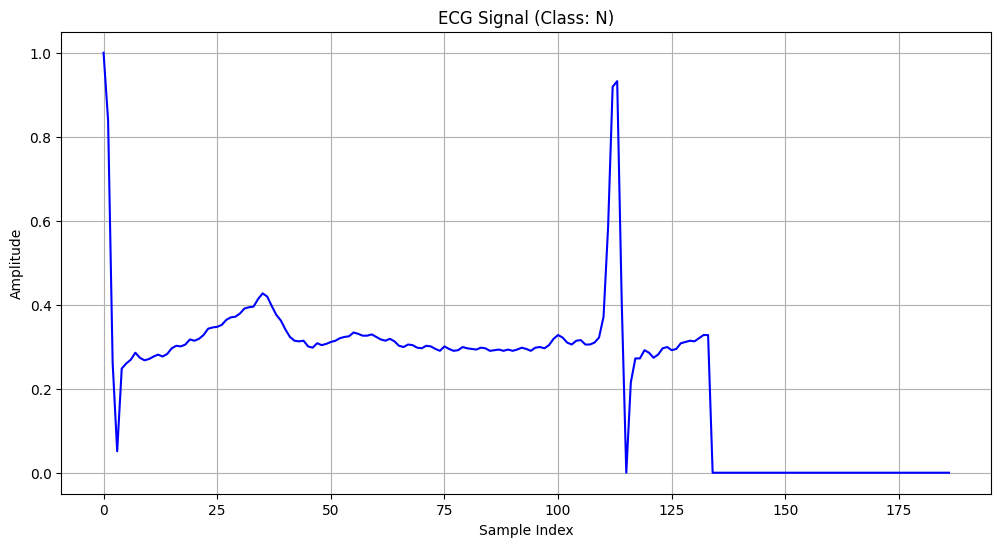

Displayed signal is from sample index 90 with label N


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Read the training dataset
train = pd.read_csv("/content/drive/MyDrive/archive (2)/mitbih_train.csv", header=None)

# Get the number of samples in the dataset
num_samples = train.shape[0]

# Choose a random sample index
random_index = 90

# Get the signal data for the chosen sample (columns 0 to 186 contain the signal data)
signal_data = train.iloc[random_index, 0:187].values

# Create a time axis (assuming each point is sampled at a fixed interval)
time_axis = np.arange(len(signal_data))

# Get the label of the chosen sample
label = train.iloc[random_index, 187]

# Map the label to its corresponding class
label_map = {0.0: 'N', 1.0: 'S', 2.0: 'V', 3.0: 'F', 4.0: 'Q'}
label_text = label_map.get(label, 'Unknown')

# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(time_axis, signal_data, 'b-')
plt.title(f'ECG Signal (Class: {label_text})')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

print(f"Displayed signal is from sample index {random_index} with label {label_text}")

In [ ]:
# Assuming num_samples is a list of labels
num_samples = ["N", "S", "V", "F", "Q", "N", "S", "N", "V"]  # Example list

signal_indices = []
for i, label in enumerate(num_samples):
    if label in ["S", "V", "F", "Q"]:
        signal_indices.append(i)

print(signal_indices)


[1, 2, 3, 4, 6, 8]


In [ ]:
# reading csv file

test=pd.read_csv("/content/drive/MyDrive/archive (2)/mitbih_test.csv",header=None)
train=pd.read_csv("/content/drive/MyDrive/archive (2)/mitbih_train.csv",header=None)
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

In [ ]:
print("Type\tCount")
print((train[187]).value_counts())

print("train shape : ",train.shape)
print("test shape : ",test.shape)


Type	Count
187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64
train shape :  (87554, 188)
test shape :  (21892, 188)


In [ ]:
label_train=[]                              # making multiclass to binary class now labels_train containing either 0 or 1
for i in train.iloc[:,187] :
  if i not in  [0.0]:
    label_train.append(1)
    # print("value is",i)
  else:
    label_train.append(0)
    # print("value",i)


In [ ]:
label_test=[]                              # making multiclass to binary class.now labels_test containing either 0 or 1
for i in test.iloc[:,187]:
  if i not in  [0.0]:
    label_test.append(1)
    # print("value is",i)
  else:
    label_test.append(0)
    #print("value",i)


In [ ]:
#create new df
labels_train = pd.DataFrame({'col':label_train})
print (labels_train)

labels_test = pd.DataFrame({'col':label_test})
print (labels_test)


       col
0        0
1        0
2        0
3        0
4        0
...    ...
87549    1
87550    1
87551    1
87552    1
87553    1

[87554 rows x 1 columns]
       col
0        0
1        0
2        0
3        0
4        0
...    ...
21887    1
21888    1
21889    1
21890    1
21891    1

[21892 rows x 1 columns]


In [ ]:
label_train=np.asarray(label_train)

label_test=np.asarray(label_test)

train[187] = labels_train    # replace labels column with binary labels
test[187] =  labels_test

In [ ]:
print('Count of all classes in training dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in test dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in training dataset
Type	Count
187
0    72471
1    15083
Name: count, dtype: int64
*************************************
Count of all classes in test dataset
Type	Count
187
0    18118
1     3774
Name: count, dtype: int64


In [ ]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187]
#feature_train=train.iloc[:,3]
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187]
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187]
#feature_test=test.iloc[:,3]
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187]
print("labels_test shape : ",labels_test.shape)

train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data
print(feature_train.shape)

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data
print(feature_test.shape)



(87554, 187)
(21892, 187)


In [ ]:
!pip install np_utils
!pip install keras --upgrade
!pip install keras



In [ ]:
x_train1=feature_train
x_test1=feature_test
y_train1=labels_train
y_test1=labels_test

In [ ]:
# Add an Extra Dimension
x_train1=x_train1.reshape(x_train1.shape[0],1,x_train1.shape[1])
x_test1=x_test1.reshape(x_test1.shape[0],1,x_test1.shape[1])


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns

# Sample code to verify functionality
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

# Create some sample data
data = np.array([[1, 2, 3], [4, 5, 6]])
labels = np.array([0, 1])

# One-hot encoding of labels
labels_categorical = to_categorical(labels)

print("Labels (categorical):", labels_categorical)


TensorFlow version: 2.18.0
Keras version: 3.6.0
Labels (categorical): [[1. 0.]
 [0. 1.]]


In [ ]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence

# fixed random seed for reproducibility
np.random.seed(7)

# here we are having a class number for each sample
print("Class label of first sample:", y_train1[83456])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Y_train = to_categorical(label_train, 2)
Y_test = to_categorical(label_test, 2)
Y_train = to_categorical(y_train1)
print("After converting the output into a vector : ", Y_train[83456])
Y_test = to_categorical(y_test1)


Class label of first sample: 1
After converting the output into a vector :  [0. 1.]


In [ ]:

print("feature_train",x_train1.shape)
print("Y_train",Y_train.shape)
print("feature_test",x_test1.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 1, 187)
Y_train (87554, 2)
feature_test (21892, 1, 187)
Y_test (21892, 2)


In [ ]:
output_dim = 2
input_dim = feature_train.shape[1]

batch_size = 512
nb_epoch = 100

model_lstm =Sequential()
#model_lstm.add(Embedding)
model_lstm.add(LSTM(100))
model_lstm.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

#model_lstm.summary()

model_lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model_lstm.fit(x_train1, Y_train, epochs=100,batch_size=512)


Epoch 1/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8576 - loss: 0.3691
Epoch 2/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9517 - loss: 0.1545
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9610 - loss: 0.1280
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9651 - loss: 0.1153
Epoch 5/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9710 - loss: 0.0932
Epoch 6/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9721 - loss: 0.0882
Epoch 7/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9746 - loss: 0.0803
Epoch 8/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9768 - loss: 0.0742
Epoch 9/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9781 - loss: 0.0688
Epoch 10/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9804 - loss: 0.0631
Epoch 11/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9818 - loss: 0.0600
Epoch 12/100
172/172 ━━━━━━━━━

In [ ]:
predictions=model_lstm.predict(x_test1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.96      0.94      0.95      3774

    accuracy                           0.98     21892
   macro avg       0.97      0.97      0.97     21892
weighted avg       0.98      0.98      0.98     21892



In [ ]:
print(predictions)
a=predictions.argmax(axis=1)     # 0 is row and 1 is column
#print(a)

#create new df
a = pd.DataFrame({'col':a})

print("Type\tCount")
print((a['col']).value_counts())

[[9.9999994e-01 3.3045269e-15]
 [9.9999994e-01 3.0559510e-10]
 [9.9999994e-01 1.4586851e-10]
 ...
 [6.3516182e-14 1.0000000e+00]
 [8.8528944e-22 1.0000000e+00]
 [4.4833044e-19 1.0000000e+00]]
Type	Count
col
0    18199
1     3693
Name: count, dtype: int64


In [ ]:


#                 precision    recall  f1-score
#           0       0.99      0.99      0.99
#           1       0.96      0.94      0.95

#    accuracy  : 0.98


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.96      0.94      0.95      3774

    accuracy                           0.98     21892
   macro avg       0.97      0.97      0.97     21892
weighted avg       0.98      0.98      0.98     21892

Analyzing sample signal 9...
True Label: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: Normal Heartbeat


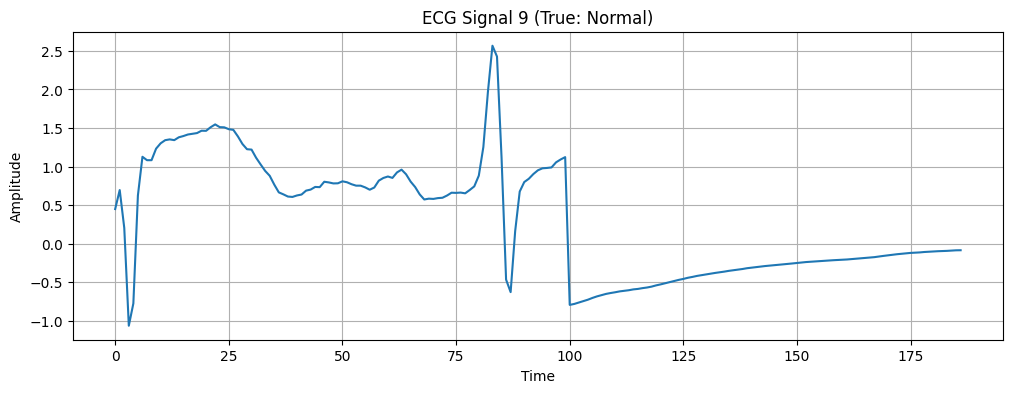


Analyzing custom signal...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Normal Heartbeat


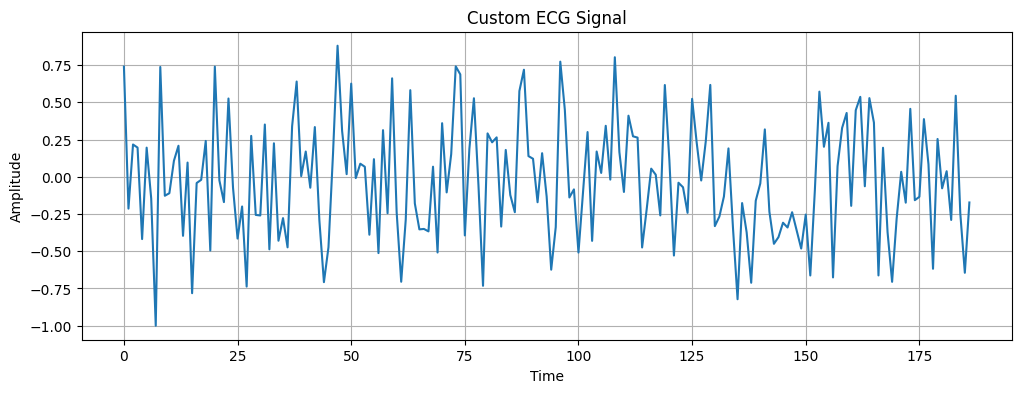

In [ ]:
# Evaluate the model
predictions = model_lstm.predict(x_test1)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1)))

# Save the model for future use
model_lstm.save("/content/drive/MyDrive/mit-bh/heartbeat_classifier.h5")

# Function to preprocess a single ECG signal
def preprocess_signal(signal):
    # Ensure the signal has the correct length (187 in this case)
    if len(signal) != 187:
        raise ValueError("Signal must have 187 data points")

    # Reshape for sklearn's StandardScaler
    signal = np.array(signal).reshape(1, -1)

    # Use the same scaler that was used for training data
    standardized_signal = StandardScaler().fit_transform(signal)

    # Reshape for LSTM input (samples, timesteps, features)
    return standardized_signal.reshape(1, 1, 187)

# Function to predict heartbeat type
def predict_heartbeat(signal):
    try:
        processed_signal = preprocess_signal(signal)
        prediction = model_lstm.predict(processed_signal)
        class_idx = prediction.argmax(axis=1)[0]

        if class_idx == 0:
            return "Normal Heartbeat"
        else:
            return "Abnormal Heartbeat"
    except Exception as e:
        return f"Error: {str(e)}"

# Example: Let's take a sample from the test set
sample_idx = 9  # You can change this index to try different samples
sample_signal = feature_test[sample_idx]
true_label = "Normal" if label_test[sample_idx] == 0 else "Abnormal"

print(f"Analyzing sample signal {sample_idx}...")
print("True Label:", true_label)
print("Prediction:", predict_heartbeat(sample_signal))

# Let's also visualize this ECG signal
plt.figure(figsize=(12, 4))
plt.plot(sample_signal)
plt.title(f'ECG Signal {sample_idx} (True: {true_label})')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Now let's create a custom ECG signal for testing
# This is just a dummy example; in practice, you'd use real ECG data
sampling_rate = 100
data_length = 187
ecg_data = np.random.normal(0, 1, data_length)

# Add some noise to the data
noise_amplitude = 0.5
ecg_data += np.random.normal(0, noise_amplitude, data_length)

# Scale the data to be between -1 and 1
ecg_data /= np.max(np.abs(ecg_data))

# sampling_rate = 360
# data_length = 187

# # Generate random data with a normal distribution
# ecg_data = np.random.normal(0, 1, data_length)

# # Add noise to the data
# noise_amplitude = 0.5
# noise = np.random.normal(0, noise_amplitude, data_length)
# noisy_ecg_data = ecg_data + noise

# # Scale the data to be between -1 and 1
# noisy_ecg_data /= np.max(np.abs(noisy_ecg_data))

print("\nAnalyzing custom signal...")
print("Prediction:", predict_heartbeat(ecg_data))

# Visualize the custom signal
plt.figure(figsize=(12, 4))
plt.plot(ecg_data)
plt.title('Custom ECG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# You can also test the model with signals from scientific papers or other sources
# Just make sure they have 187 data points or interpolate/truncate them to fit